<a href="https://colab.research.google.com/github/olgasherbiena/KPI/blob/main/%D0%90%D0%9A_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dataset_path = kagglehub.dataset_download("piyushrumao/malware-executable-detection")
malware_data = pd.read_csv(os.path.join(dataset_path, "uci_malware_detection.csv"))


print("First 5 records:", malware_data.head())
malware_data.shape


Using Colab cache for faster access to the 'malware-executable-detection' dataset.
First 5 records:            Label  F_1  F_2  F_3  F_4  F_5  F_6  F_7  F_8  F_9  ...  F_522  \
0  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   
1  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   
2  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   
3  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   
4  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   

   F_523  F_524  F_525  F_526  F_527  F_528  F_529  F_530  F_531  
0      0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0  

[5 rows x 532 columns]


(373, 532)

К-сть рядків менша ніж к-сть ознак -> прибираємо ознаки

In [70]:
from sklearn.feature_selection import SelectKBest, f_classif
X = malware_data.drop("Label", axis=1)
y = malware_data["Label"]

# 4. Перетворимо 'malicious'/'non-malicious' → 0/1
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# => 'non-malicious' = 1, 'malicious' = 0

selector = SelectKBest(score_func=f_classif, k=3)
X_new = selector.fit_transform(X, y)



/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [  1   5   7   9  11  13  15  17  21  27  31  33  87  89  95 183 203 229
 231 449 455 457 459 481 485 487 489 491] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Label    1.000000
F_19     0.948025
F_139   -0.903605
F_20    -0.928607
Name: Label, dtype: float64


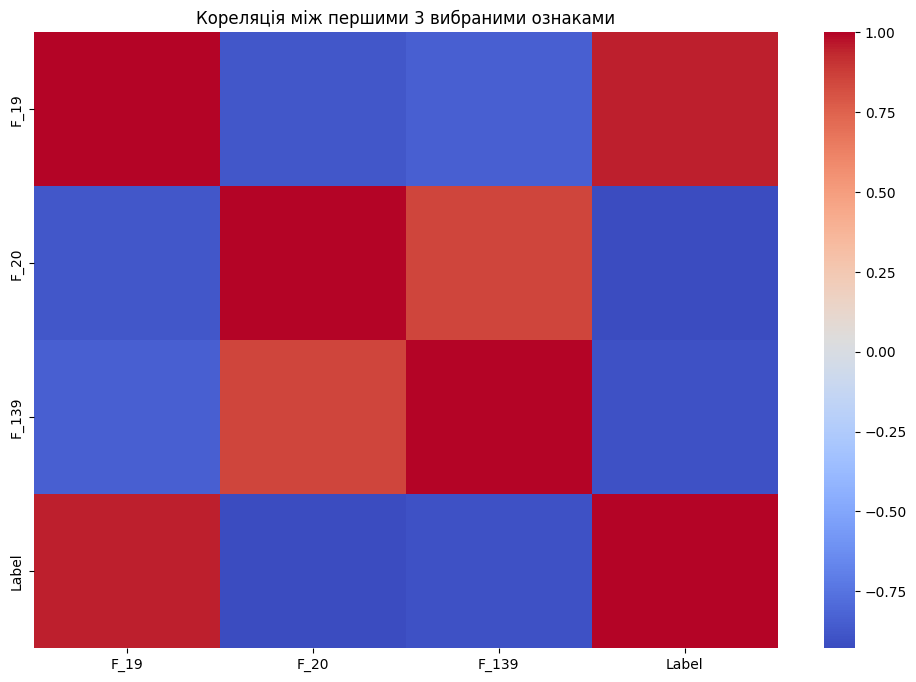

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = X.columns[selector.get_support()]  # назви обраних фіч
X_selected_df = pd.DataFrame(X_new, columns=selected_features)

# 2. Додаємо y як окрему колонку
data_selected = X_selected_df.copy()
data_selected["Label"] = y

# 3. Обчислюємо кореляцію
corr = data_selected.corr()

# 4. Виводимо топ фіч, що найбільше корелюють із Label
print(corr["Label"].sort_values(ascending=False).head(10))

# 5. (Опціонально) будуємо теплову карту для перших 15 фіч
plt.figure(figsize=(12, 8))
sns.heatmap(corr.iloc[:15, :15], cmap="coolwarm", annot=False)
plt.title(f"Кореляція між першими {X_new.shape[1]} вибраними ознаками")
plt.show()

In [75]:
# якщо 100 ознак - > точність 0.97
# якщо 50 ознак - > точність 0.97
# якщо 10 ознак - > 0.97
# якщо 5 ознак - > 0,98
# якщо 3 ознаки - > 0,98

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Масштабуємо
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Модель
model = LogisticRegression(max_iter=800)
model.fit(X_train_scaled, y_train)

# Оцінка
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.9866666666666667
               precision    recall  f1-score   support

    malicious       1.00      0.98      0.99        58
non-malicious       0.94      1.00      0.97        17

     accuracy                           0.99        75
    macro avg       0.97      0.99      0.98        75
 weighted avg       0.99      0.99      0.99        75

